In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [80]:
emails_t2 = pd.read_csv('/content/Spam.csv')

In [81]:

emails_t2.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [82]:
emails_t2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [83]:
emails_t2.shape

(4601, 58)

In [92]:
emails_df_cleaned = emails_t2.drop_duplicates(keep='first')

In [93]:
emails_df_cleaned.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [86]:
emails_t2.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


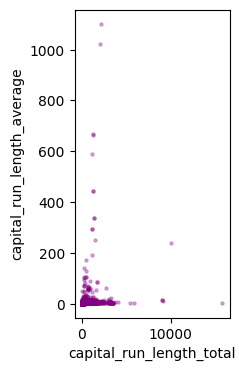

In [87]:
emails_t2.plot(kind='scatter', x='capital_run_length_total', y='capital_run_length_average', s=5, alpha=0.3, color='purple', figsize=(2, 4))
plt.show()

In [94]:
emails_t2.loc[emails_t2['spam'] == 0, 'spam'] = 'ham'
emails_t2.loc[emails_t2['spam'] == 1, 'spam'] = 'spam'
emails_t2.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


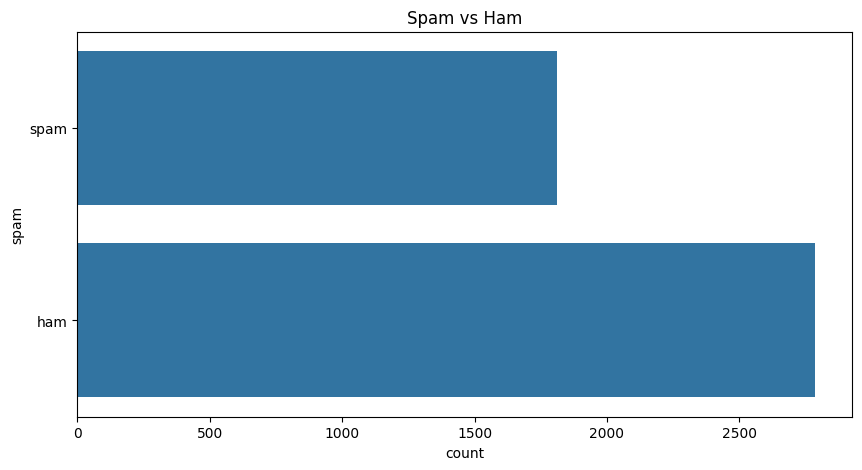

In [89]:
plt.figure(figsize=(10, 5))
sns.countplot(emails_t2['spam'])
plt.title('Spam vs Ham')
plt.show()

In [90]:
x=emails_df_cleaned.drop(columns=['spam'])
y=emails_df_cleaned

In [98]:
x=emails_df_cleaned.drop(columns=['spam'])
y=emails_df_cleaned['spam']

In [99]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x = emails_df_cleaned.drop('spam', axis=1)
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [100]:
y_pred = nb_classifier.predict(x_test)

In [101]:
y_pred_nb = nb_classifier.predict(x_test)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

         ham       0.82      0.85      0.83       483
        spam       0.79      0.74      0.76       359

    accuracy                           0.80       842
   macro avg       0.80      0.80      0.80       842
weighted avg       0.80      0.80      0.80       842



In [102]:
y_pred_nb


array(['ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
       'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'ham', 

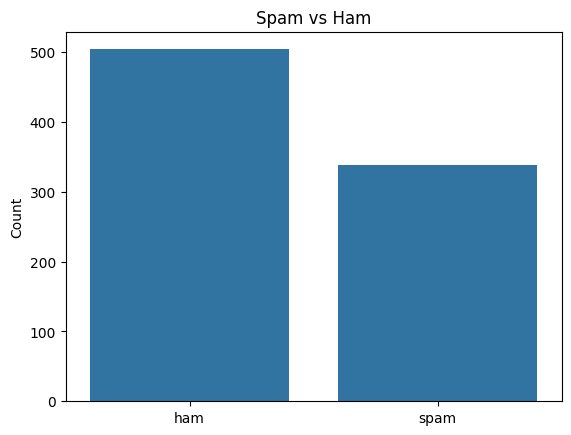

In [103]:
sns.countplot(x=y_pred_nb)
plt.title('Spam vs Ham')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [104]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)
print("Naive Bayes Accuracy:")
print(nb_accuracy)


Naive Bayes Accuracy: 0.8040380047505938
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.82      0.85      0.83       483
        spam       0.79      0.74      0.76       359

    accuracy                           0.80       842
   macro avg       0.80      0.80      0.80       842
weighted avg       0.80      0.80      0.80       842

Naive Bayes Accuracy:
0.8040380047505938


In [105]:
x = emails_df_cleaned
y = emails_df_cleaned['spam']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
x = emails_df_cleaned.drop('spam', axis=1)
y = emails_df_cleaned['spam']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [108]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [109]:
y_pred_svm = svm_classifier.predict(x_test)

In [110]:
y_pred_svm

array(['spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 's

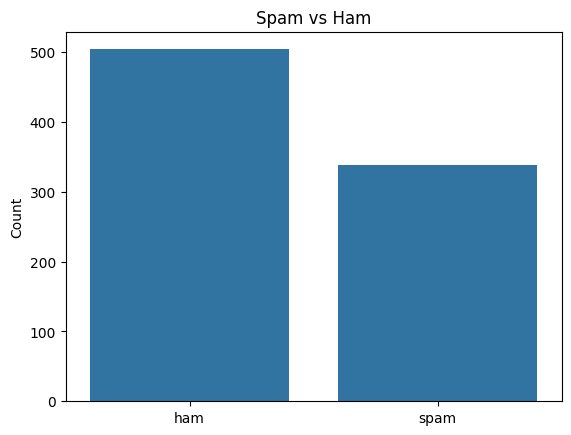

In [111]:
sns.countplot(x=y_pred_nb)
plt.title('Spam vs Ham')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [112]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
print("\nSupport Vector Machine Classifier:")
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)


Support Vector Machine Classifier:
SVM Accuracy: 0.6852731591448931
SVM Classification Report:
               precision    recall  f1-score   support

         ham       0.67      0.90      0.77       483
        spam       0.74      0.40      0.52       359

    accuracy                           0.69       842
   macro avg       0.71      0.65      0.64       842
weighted avg       0.70      0.69      0.66       842



In [114]:
model_performance = pd.DataFrame({
    'Model': ['Naive Bayes', 'Support Vector Machine'],
    'Accuracy': [nb_accuracy, svm_accuracy]
})


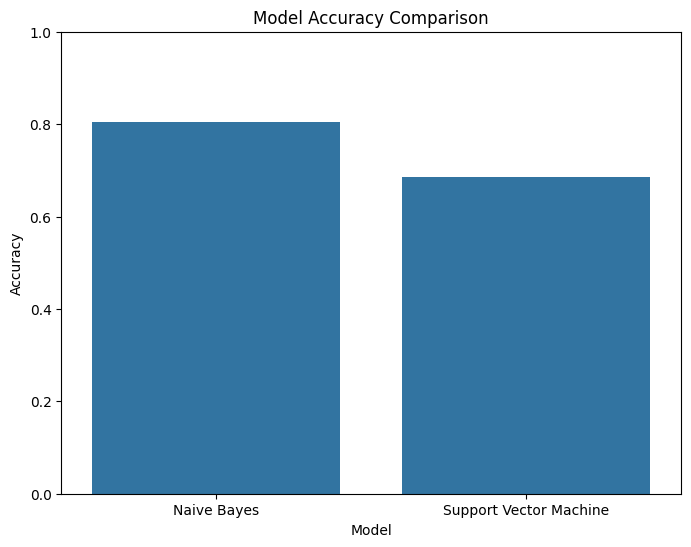

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()